In [162]:
import  pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from imblearn.over_sampling import RandomOverSampler

In [3]:
df = pd.read_csv("data/loan_train.csv")

In [4]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 613 entries, 0 to 613
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  613 non-null    object 
 1   Married                 613 non-null    object 
 2   Dependents              613 non-null    object 
 3   Education               613 non-null    object 
 4   Self_Employed           613 non-null    object 
 5   Loan_Amount             613 non-null    int64  
 6   Term                    613 non-null    float64
 7   Credit_History          613 non-null    float64
 8   Area                    613 non-null    object 
 9   Status                  613 non-null    object 
 10  total_applicant_income  613 non-null    float64
dtypes: float64(3), int64(1), object(7)
memory usage: 57.5+ KB


In [6]:
df.describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History
count,6.140000e+02,6.140000e+02,6.140000e+02,600.00000,564.000000
mean,5.403459e+05,1.621246e+05,1.414104e+07,342.00000,0.842199
std,6.109042e+05,2.926248e+05,8.815682e+06,65.12041,0.364878
min,1.500000e+04,0.000000e+00,0.000000e+00,12.00000,0.000000
25%,2.877500e+05,0.000000e+00,9.800000e+06,360.00000,1.000000
50%,3.812500e+05,1.188500e+05,1.250000e+07,360.00000,1.000000
75%,5.795000e+05,2.297250e+05,1.647500e+07,360.00000,1.000000
max,8.100000e+06,4.166700e+06,7.000000e+07,480.00000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       582 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                600 non-null    float64
 9   Credit_History      564 non-null    float64
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB


In [8]:
df.isnull().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  14
Credit_History        50
Area                   0
Status                 0
dtype: int64

TREATING NULL VALUES

In [9]:
freq = df["Gender"].mode()
df["Gender"] = df["Gender"].fillna(freq.iloc[0])


df["Gender"].value_counts()

Gender
Male      502
Female    112
Name: count, dtype: int64

In [10]:
freq = df["Dependents"].mode()
df["Dependents"] = df["Dependents"].fillna(freq.iloc[0])


In [11]:
freq = df["Married"].mode()
df["Married"] = df["Married"].fillna(freq.iloc[0])

In [12]:
freq = df["Self_Employed"].mode()
df["Self_Employed"] = df["Self_Employed"].fillna(freq.iloc[0])

In [13]:
mea = round(df["Term"].mean())
df["Term"] = df["Term"].fillna(mea)

In [14]:
freq = df["Credit_History"].mode()
df["Credit_History"] = df["Credit_History"].fillna(freq.iloc[0])

ANALYSIS

VISUALIZATION

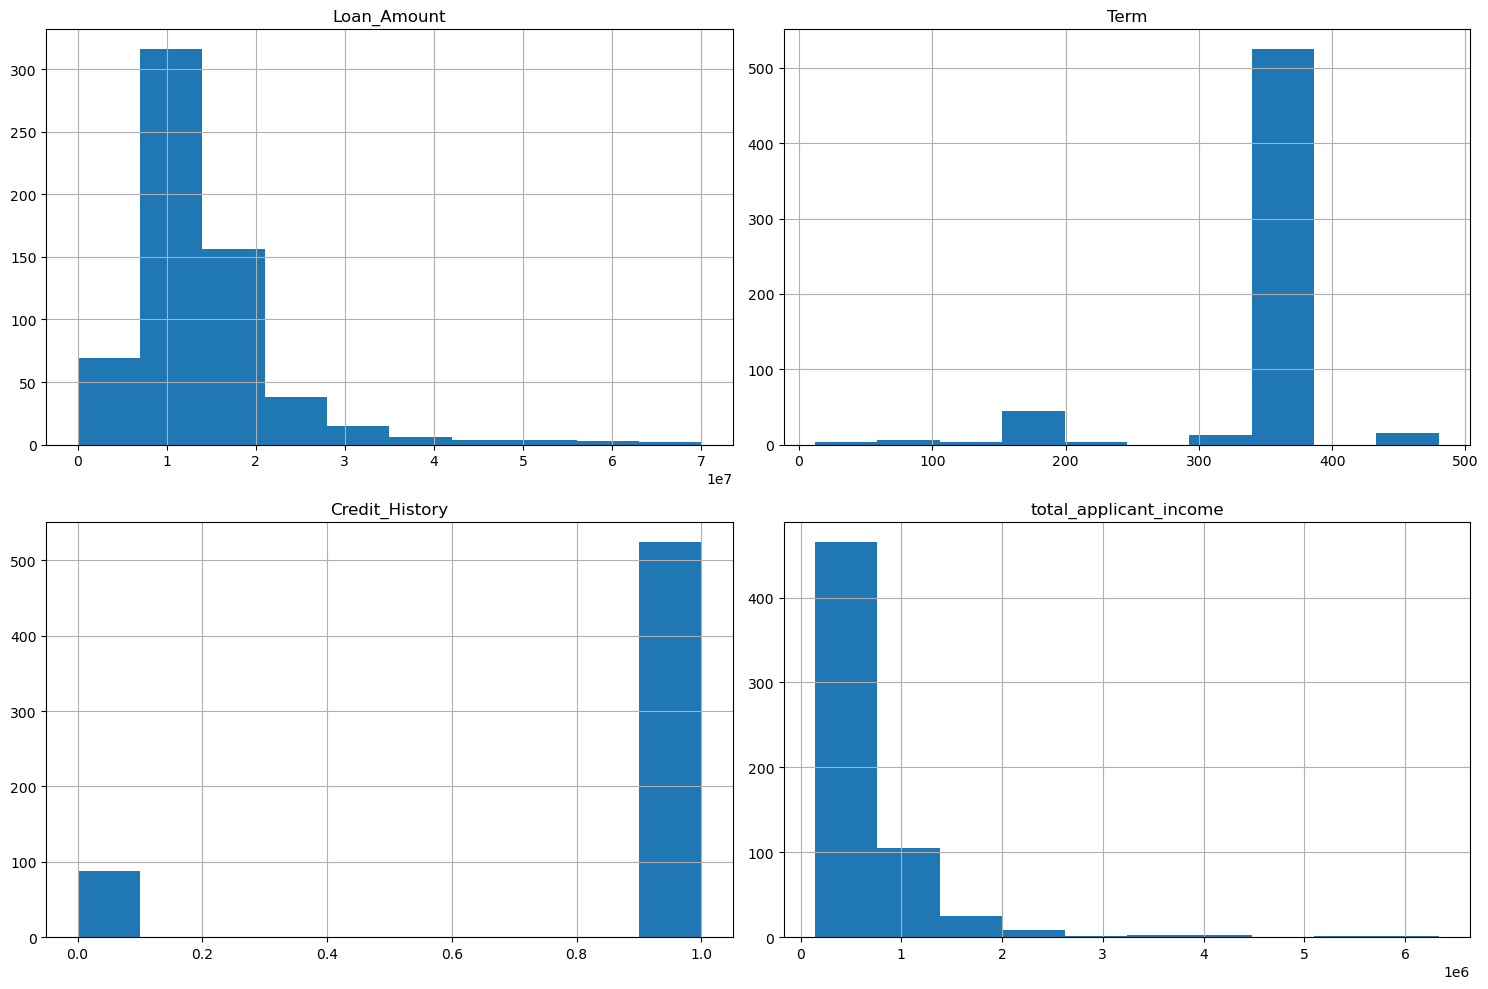

In [86]:
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()


In [103]:
df['Loan_Amount'] = np.log1p(df['Loan_Amount'])

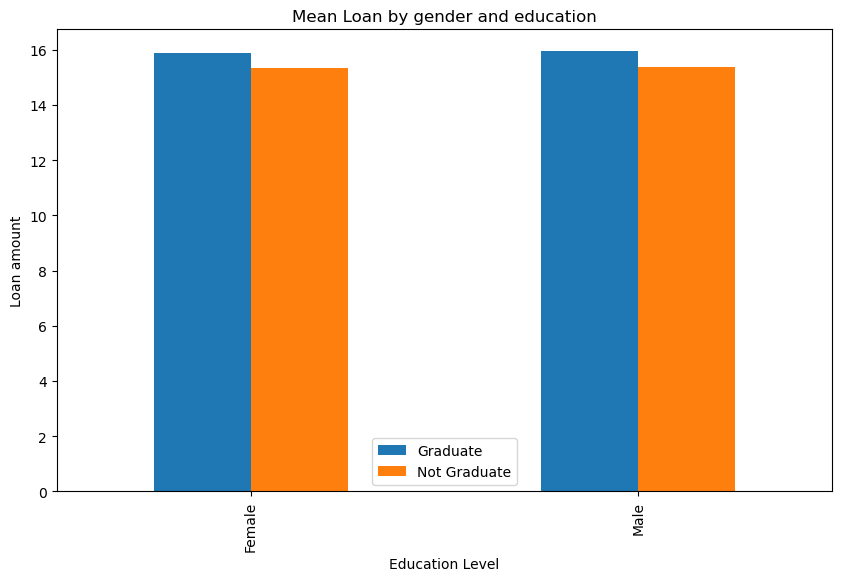

In [104]:
data = df.groupby(["Gender","Education"])["Loan_Amount"].mean()
#this creates gender as cols and education as rows

datas = data.unstack()

ax = datas.plot(kind='bar',figsize=(10,6))
plt.title("Mean Loan by gender and education")
plt.xlabel("Education Level")
plt.ylabel("Loan amount")
plt.legend()

#on avg graduate man demands for more loan then graduate femlae
#graduate male and female on avg takes larger loan amount then not graduate male and females

Relationship plot catagorical variable with target

Text(0.5, 1.0, 'Loan Status by Gender')

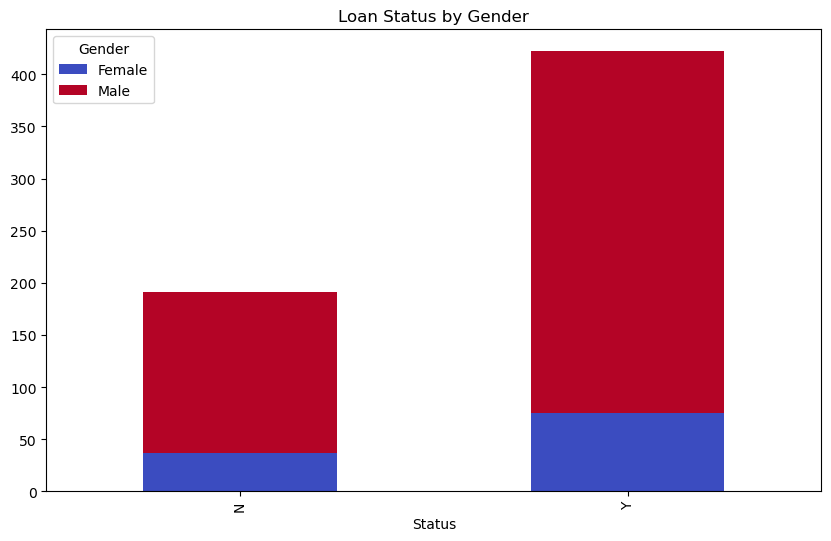

In [105]:

data = pd.crosstab(df["Status"],df["Gender"])
data.plot(kind='bar',stacked=True,figsize=(10,6),cmap='coolwarm')

#on avg male have higer chances of apporoval and disapproval of loan then female  its because man tends to have higher papulation 
plt.title("Loan Status by Gender")

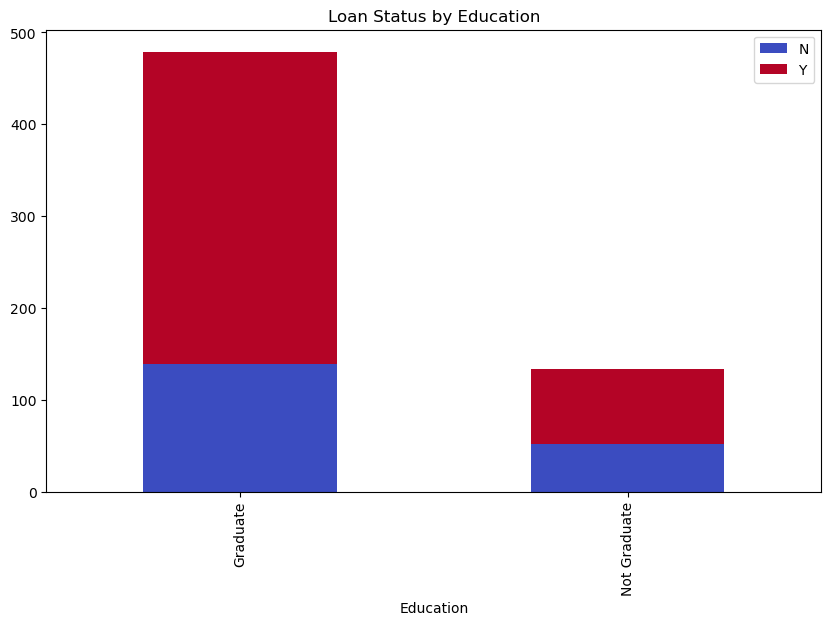

In [106]:
#on avg graduated people are more likely to get loan approval
#quetion loan approval status  interms on area
data = pd.crosstab(df["Education"],df["Status"])


data.plot(kind='bar',stacked=True,figsize=(10,6),cmap='coolwarm')
plt.title("Loan Status by Education")
plt.legend()


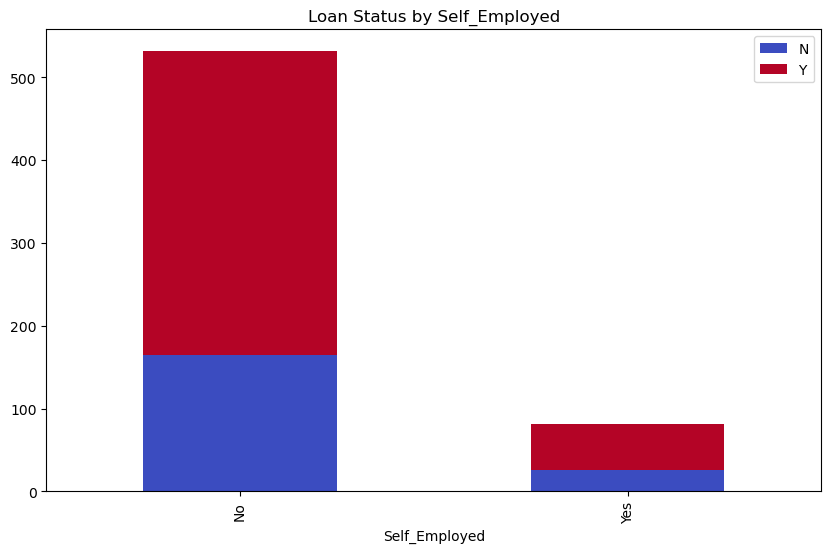

In [107]:
#self employed vs loan status
data = pd.crosstab(df["Self_Employed"],df["Status"])


data.plot(kind='bar',stacked=True,figsize=(10,6),cmap='coolwarm')
plt.title("Loan Status by Self_Employed")
plt.legend()

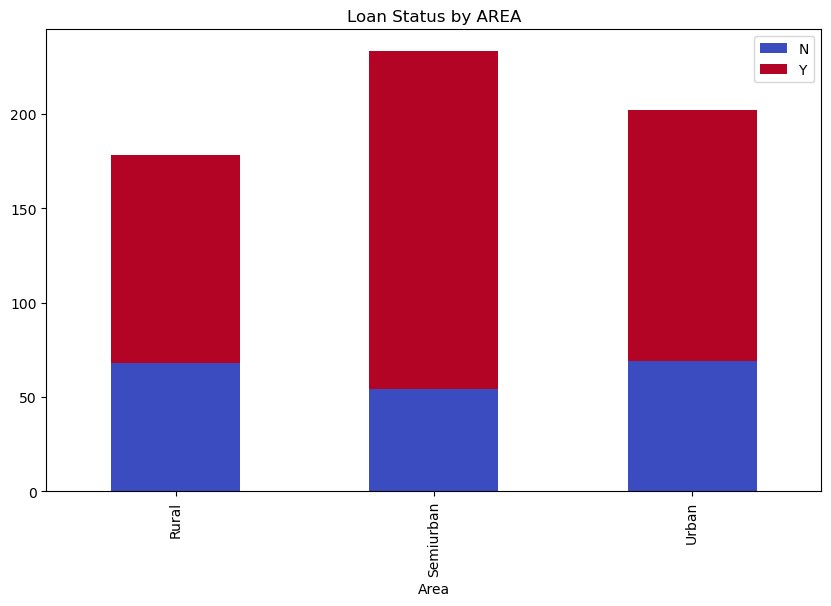

In [108]:
#self employed vs loan status
data = pd.crosstab(df["Area"],df["Status"])


data.plot(kind='bar',stacked=True,figsize=(10,6),cmap='coolwarm')
plt.title("Loan Status by AREA")
plt.legend()

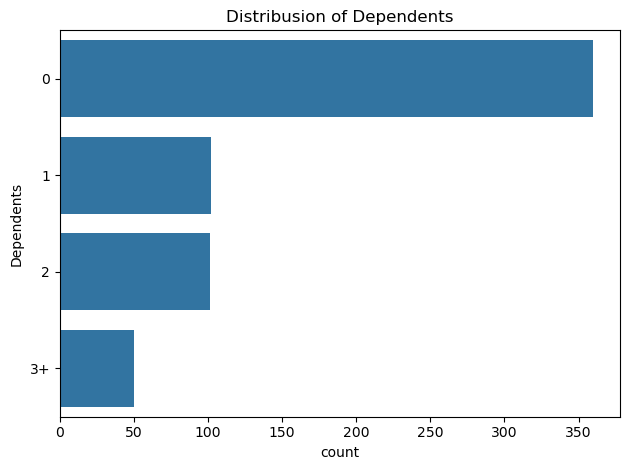

In [109]:
#“Most applicants in the loan prediction dataset have 0 dependents.
sns.countplot(df["Dependents"])
plt.title("Distribusion of Dependents")
plt.tight_layout()


Relation ship between numeric features

Text(0.5, 1.0, 'Relation between Income and Loan Amount')

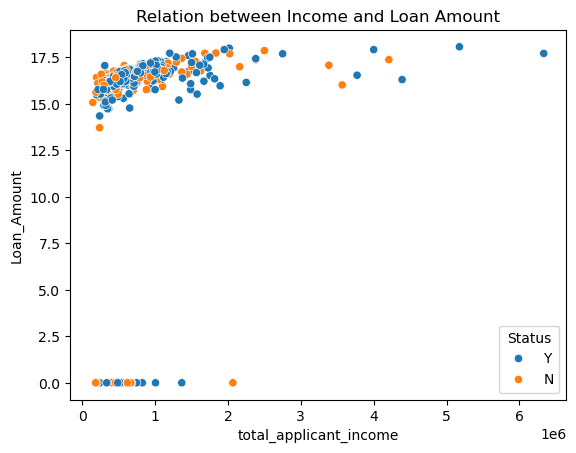

In [153]:
#Applicant_Income vs Loan_Amount
sns.scatterplot(data=df,x='total_applicant_income',y='Loan_Amount',hue='Status')
plt.title("Relation between Income and Loan Amount")

In [152]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount,Term,Credit_History,Area,Status,total_applicant_income
0,Male,No,0,Graduate,No,16.523561,360.0,1.0,Urban,Y,584900.0
1,Male,Yes,1,Graduate,No,16.364956,360.0,1.0,Rural,N,609100.0
2,Male,Yes,0,Graduate,Yes,15.702580,360.0,1.0,Urban,Y,300000.0
3,Male,Yes,0,Not Graduate,No,16.300417,360.0,1.0,Urban,Y,494100.0
4,Male,No,0,Graduate,No,16.461685,360.0,1.0,Urban,Y,600000.0


boxplot between numerical and catagoorcal Features

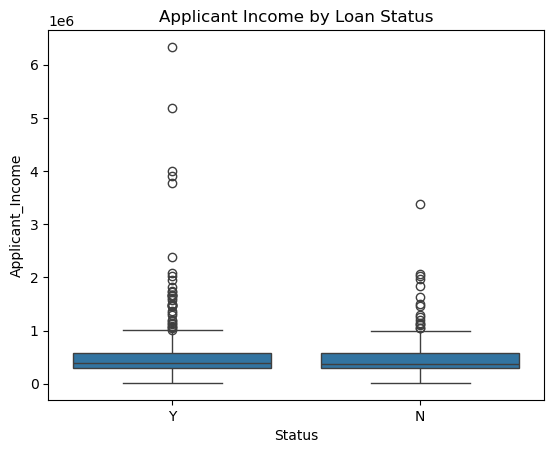

In [ ]:
sns.boxplot(data=df, x="Status", y="Applicant_Income")
plt.title("Applicant Income by Loan Status")
plt.show()

In [ ]:
df[(df["Applicant_Income"]>8000000) & (df["Status"]=="N")]
#409 outlier
df = df.drop(409)

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


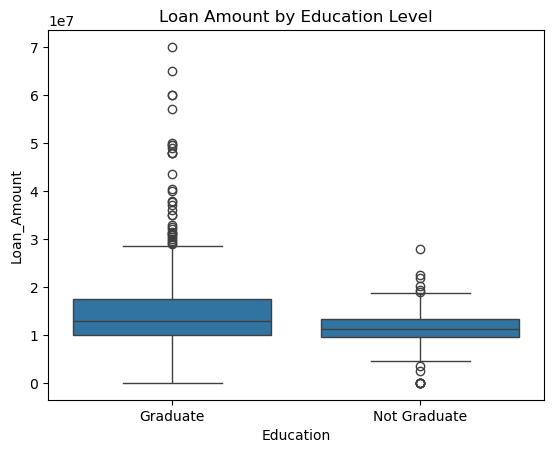

In [ ]:
sns.boxplot(data=df, x="Education", y="Loan_Amount")
plt.title("Loan Amount by Education Level")
plt.show()

<Axes: xlabel='Status', ylabel='count'>

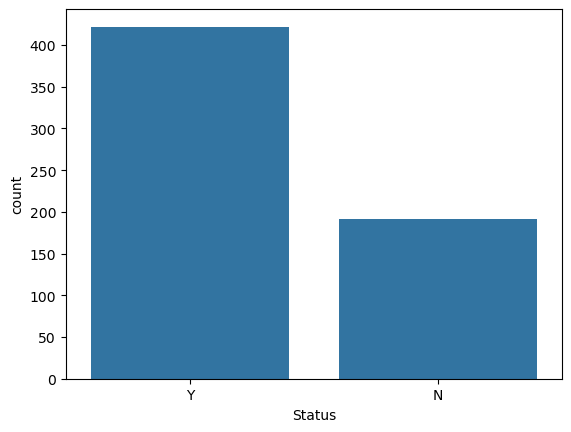

In [ ]:
#Status 
sns.countplot(x='Status',data=df)
#we can see that Y has more frequency than N
#the data is imbalanced 
#we can use over sampler to fix this issue

correlation heatmap

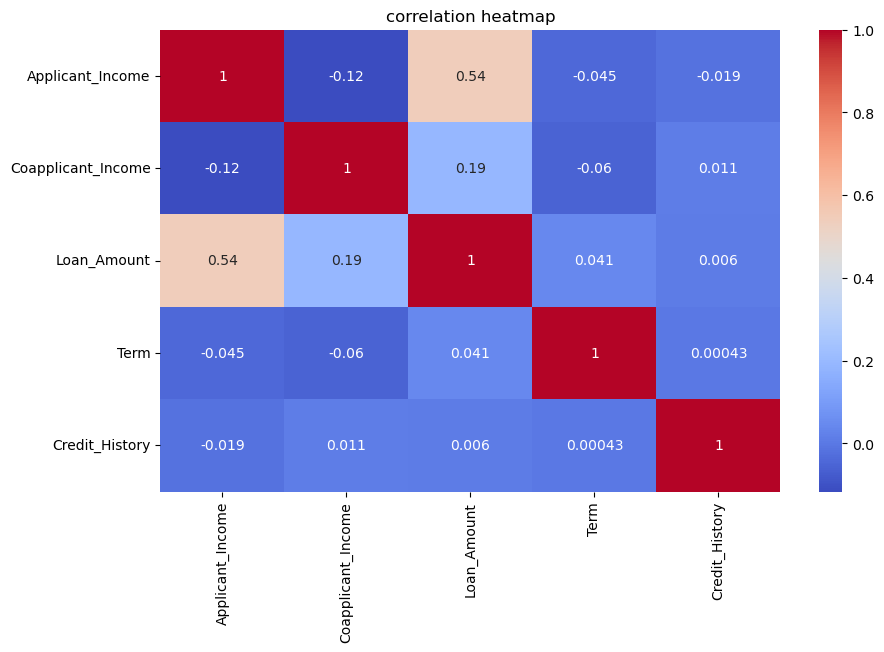

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['int','float']).corr(),annot=True,cmap='coolwarm')
plt.title("correlation heatmap")
plt.show()

In [111]:
#Feature Engineering
df["total_applicant_income"] = df["Applicant_Income"]+df["Coapplicant_Income"]

KeyError: 'Applicant_Income'

In [154]:
df = df.drop(columns=["Applicant_Income","Coapplicant_Income"])

KeyError: "['Applicant_Income', 'Coapplicant_Income'] not found in axis"

Feature matrix and target vector

In [ ]:
x = df.drop(columns=["Status"])
y = df["Status"]

split data horizontally

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

#create column transformer

In [ ]:
objcol = x.select_dtypes(include=['object']).columns.to_list()
numcols = x.select_dtypes(include=['int','float']).columns.to_list()

In [ ]:
preprocessor = ColumnTransformer(
               transformers=[
               ('cat',OneHotEncoder(drop='first',sparse_output=False),objcol),
               ('num',StandardScaler(),numcols)
															]
)

Linear Regression

In [179]:
from imblearn.over_sampling import SMOTE
pipeline = Pipeline([
          ('transformer',preprocessor),
          ('oversample',RandomOverSampler(random_state=42)),
          ('classifier',LogisticRegression(class_weight='balanced',random_state=42,max_iter=2000))
])

In [180]:
pipeline.fit(xtrain,ytrain)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed', 'Area']),
                                                 ('num', StandardScaler(),
                                                  ['Loan_Amount', 'Term',
                                                   'Credit_History',
                                                   'total_applicant_income'])])),
                ('oversample', RandomOverSampler(random_state=42)),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=2000,
                                    random_state=42))])

In [181]:
xtestpred = pipeline.predict(xtest)

In [182]:
print(classification_report(xtestpred,ytest))

              precision    recall  f1-score   support

           N       0.50      0.68      0.58        31
           Y       0.88      0.77      0.82        92

    accuracy                           0.75       123
   macro avg       0.69      0.72      0.70       123
weighted avg       0.78      0.75      0.76       123



KNeighborsClassifier

In [183]:
KNpipeline = Pipeline([
          ('transformer',preprocessor),
           ('oversample',RandomOverSampler(random_state=42)),
          ('classifier',KNeighborsClassifier())
])


In [184]:
KNpipeline.fit(xtrain,ytrain)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed', 'Area']),
                                                 ('num', StandardScaler(),
                                                  ['Loan_Amount', 'Term',
                                                   'Credit_History',
                                                   'total_applicant_income'])])),
                ('oversample', RandomOverSampler(random_state=42)),
                ('classifier', KNeighborsClassifier())])

In [185]:
xtestpred = KNpipeline.predict(xtest)

In [186]:
print(classification_report(xtestpred,ytest))

              precision    recall  f1-score   support

           N       0.50      0.53      0.51        40
           Y       0.77      0.75      0.76        83

    accuracy                           0.67       123
   macro avg       0.63      0.64      0.63       123
weighted avg       0.68      0.67      0.68       123



random forest classifier

In [188]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
rf_pipeline = Pipeline([
          ('transformer',preprocessor),
           ('oversample',SMOTE(random_state=42)),
          ('classifier',RandomForestClassifier(random_state=42,class_weight='balanced'))#class_weight='balanced' forces the model to pay more attention to minority classes.
])

In [189]:
rf_pipeline.fit(xtrain,ytrain)


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed', 'Area']),
                                                 ('num', StandardScaler(),
                                                  ['Loan_Amount', 'Term',
                                                   'Credit_History',
                                                   'total_applicant_income'])])),
                ('oversample', SMOTE(random_state=42)),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [190]:
ytestpred = rf_pipeline.predict(xtest)

In [191]:
print(classification_report(xtestpred,ytest))

              precision    recall  f1-score   support

           N       0.50      0.53      0.51        40
           Y       0.77      0.75      0.76        83

    accuracy                           0.67       123
   macro avg       0.63      0.64      0.63       123
weighted avg       0.68      0.67      0.68       123



In [194]:
rf_pipeline = Pipeline([
          ('transformer',preprocessor),
           ('oversample',RandomOverSampler(random_state=42)),
          ('classifier',GradientBoostingClassifier(random_state=42))#class_weight='balanced' forces the model to pay more attention to minority classes.
])

In [195]:
rf_pipeline.fit(xtrain,ytrain)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed', 'Area']),
                                                 ('num', StandardScaler(),
                                                  ['Loan_Amount', 'Term',
                                                   'Credit_History',
                                                   'total_applicant_income'])])),
                ('oversample', RandomOverSampler(random_state=42)),
                ('classifier', GradientBoostingClassifier(random_state=42))])

In [196]:
ytestpred = rf_pipeline.predict(xtest)

In [197]:
print(classification_report(xtestpred,ytest))

              precision    recall  f1-score   support

           N       0.50      0.53      0.51        40
           Y       0.77      0.75      0.76        83

    accuracy                           0.67       123
   macro avg       0.63      0.64      0.63       123
weighted avg       0.68      0.67      0.68       123

